<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/7_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9603df558a4657ae79060d9b93dade44ef1d17f46302404dfd5fc4f3a486b2b8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(10,6)})

from pandas.core.common import random_state

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


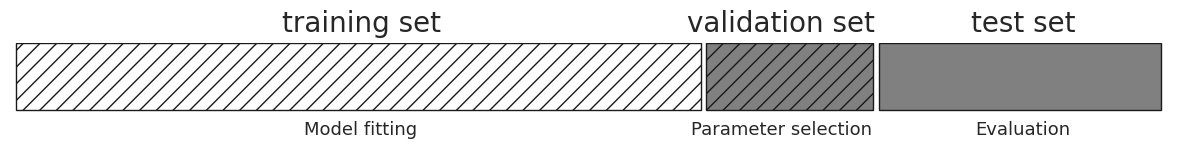

In [3]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
mglearn.plots.plot_threefold_split()

4장에선 데이터 속성을 나타내는 두 가지 특성에 관해 이야기 했다. 정량적인 연속형 특성과 고정된 값인 범주형 특성. 많은 애플리케이션에서 사용하는 세번째 유형의 데이터가 있는데, 그건 텍스트이다. 회사에선 고객 메시지가 불만사항인지 문의사항인지 구분해야 할 때가 많다 . 메시지의 제목이나 내용으로 고객의 의도를 자동으로 파악해서 적절한 부서로 전달하거나, 완전 자동으로 응답할 수도 있다. 

\
텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다. 텍스트 데이터의 길이는 서로 같은 경우가 거의 없다. 이런 특성은 이제까지 본 수치형 특성과 매우 다르므로 머신러닝 알고리즘에 적용하기 전에 전처리를 해야한다.

### 7.1 문자열 데이터 타입
텍스트 데이터를 처리하는 과정에 들어가기 전에, 자주 나타나는 몇 가지 텍스트 데이터에 대해 알아보자. 문자열 데이터는 4가지 종류가 있다.
- 범주형 데이터
- 범주에 의미를 연결시킬 수 있는 임의의 문자열
- 구조화된 문자열 데이터
- 텍스트 데이터

\
**범주형 데이터**는 고정된 목록으로 구성된다. 예를 들어 선호하는 색깔(빨주노초파남보) 이 경우 데이터셋에 7개의 값중 하나가 들어가면 범주형 변수로 인코딩된다. 그리고 데이터셋에 고유값을 찾아 이 값들이 얼마나 자주 나타나는지 히스토그램을 그려볼 수 있다. 만약 설문이 절반정도 진행됐는데 누군가 '검정'을 '검점'으로 쓴 오타를 발견해서 설문을 수정했다면, 이 데이터셋에는 같은 의미를 나타내는 검정과 검점이 모두 들어 있으므로 두 값을 하나로 합쳐야한다.

만약 선호하는 색을 묻기위해 드롭다운 메뉴가 이닌, 텍스트 필드를 제공했다고 보자. 어떤 사람은 철자를 틀리거나 회색이나 쥐색처럼 다르게 쓸수도 있다. 또 더 확실하고 구체적인 암청색이라고 쓸 수도 있다. 또한 '캘리포니아 해변 암초의 색' 처럼 사람들이 자기만의 이름을 붙이는 경우 자동 맵핑이 힘들다. 텍스트 필드로 받은 이런 응답에는 **범주에 의미를 연결시킬 수 있는 임의의 문자열**에 해당하는데, 이런 변수를 인코딩하려면 보편적인 값을 선택하든, 애플리케이션에 맞게 이런 응답을 포용할 수 있는 범주를 정의하는 게 최선이다. 여러 색의 경우라면 '여러가지색' 인코딩할 수 없는건 '그 외'라고 해야한다. 그렇기 때문에 범주형 변수로 받을 수 있는 것은 직접 입력받지 말라고 권한다.

**구조**는 미리 정의된 범주에 속하지는 않지만 주소나 장소, 사람이름, 날짜. 전화번호, 식별번호처럼 일정한 구조를 가지는 것이다.

**텍스트 테이터**는 트윗, 채팅, 호텔리뷰, 셰익스피어 작품 ,위키백과 문서, 구텐베르크 프로텍트, 50,000권의 전자책 등이 여기에 속한다.텍스트 분석에서는 데이터셋을 말뭉치라 하고, 하나의 텍스트를 의미하는 각 데이터 포인트를 문서라 한다. 이런 용어는 텍스트 데이터를 주로 다루는 정보검색과 자연어처리 공동체에서 유래했다.

## 7.2 예제 앱: 영화 리뷰 감성 분석

In [5]:
import os.path

if not os.path.isfile('data/aclImdb_v1.tar.gz'):
    !wget -q http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
    !tar -xzf data/aclImdb_v1.tar.gz -C data

In [14]:
# !은 셸(shell) 명령을 실행해주는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해 하위 폴더의 목록을 
# 볼 수 있습니다. 윈도에서는 !tree data/aclImdb 와 같이 사용하세요.
#!tree -dL 2 data/aclImdb
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg


In [7]:
!rm -r data/aclImdb/train/unsup  ## 긍정 부정 레이블이 없는 데이터 삭제

In [8]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [9]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [10]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [ ]:
text_train[7]

In [18]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print('테스트 테이터의 문서 수:', len(text_test))
print('클래스별 샘플 수 (테스트 데이터):', np.bincount(y_test))
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

테스트 테이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


풀려는 문제는 다음과 같다. 리뷰 하나가 주어졌을때, 이 리뷰의 텍스트 내용을 보고 '양성'인지 '음성'인지 구분하는 것이다. 이는 전형적 인진 분류 문제이다. 그러나 텍스트 데이터는 머신러닝 모델이 다룰 수 있는 형태가 아니다. 그래서 텍스트의 문자열 표현을 머신러닝 알고리즘에 적용할 수 있도록 수치 표현으로 바꿔야 한다.

## 7.3 텍스트 데이터를 BOW로 표현하기
BOW는 널리쓰이는 방법이다. 쓰면 장, 문단, 문장, 서식 같은 입력 테스트의 구조 대부분을 잃고 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아린다. 구조와 상관없이 단어의 출현횟수만 세기때문에 텍스트를 담는 bag으로 생각할 수 있다.
전체 말뭉치에 대핸 bow 표현을 계산하려면 다음 세 단계를 거친다.

1. < 토큰화 > 각 문서를 문서에 포함된 단어(토큰)로 나눈다. 예를 들어 공백이나 구두점 등을 기준으로 나눈다.
2. < 어휘 사전 구축 > 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다.(알파벳순서)
3. < 인코딩 > 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아린다.
